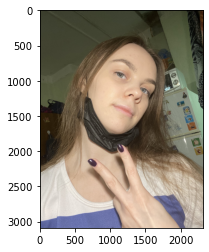

In [11]:
import numpy as np
import matplotlib.pyplot as pyplot
from mtcnn.mtcnn import MTCNN as MTCNN
import cv2
from pil import Image

img_path = "./test_ira/image-07-12-20-10-06-1.jpeg"
img = pyplot.imread(img_path)
pyplot.imshow(img)
pyplot.show()

In [12]:
def extract_face(fileName, required_size=(224,224), resize=False):
    #pixels = pyplot.imread(fileName)
    print("extract_face::fileName:" + fileName)
    pixels = cv2.cvtColor(cv2.imread(fileName), cv2.COLOR_BGR2RGB)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    if resize:
        image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

def print_image(img):
    if isinstance(img, str):
        img = pyplot.imread(img)
    pyplot.imshow(img)
    pyplot.show()

In [13]:
pathToCheckImg = "./test_ira/image-07-12-20-10-06-1.jpeg"

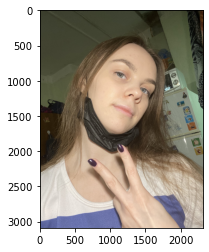

In [14]:
print_image(pathToCheckImg)

extract_face::fileName:./test_ira/image-07-12-20-10-06-1.jpeg


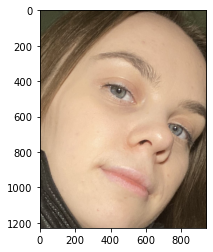

In [15]:
print_image(extract_face(pathToCheckImg))

In [19]:
from keras.models import Sequential
from keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D,Dropout, Flatten, Activation, Dense

model = Sequential()

model.add (ZeroPadding2D((1,1), input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add (ZeroPadding2D((1,1)))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add (MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))

model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add (MaxPooling2D((2,2), strides=(2,2)))


model.add(ZeroPadding2D((1,1)))

model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add (ZeroPadding2D((1,1)))

model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add (ZeroPadding2D((1,1)))

model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add (MaxPooling2D((2,2), strides=(2,2)))

model.add (ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add (ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add (MaxPooling2D((2,2), strides=(2,2)))


model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model .add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model .add (MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model .add (Dropout (0.5) )
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model .add (Dropout (0.5) )
model .add(Convolution2D(2622, (1, 1)))
model.add (Flatten ())
model .add(Activation('softmax'))

Скачаем готовые веса: https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view

In [21]:
from keras.models import model_from_json
weightPath  = "./vgg_face_weights.h5"
model.load_weights(weightPath)

Теперь нам нужно загрузить веса в сетку и зафиксировать их, т.е. сделать так, чтобы при дообучении они не изменялись.

In [22]:
# наш выходной слой с необходимым количеством нейронов в нем
final_layer = Dense(2, activation='softmax')(model.layers[-2].output)

from keras.models import Model
model = Model(model.inputs, final_layer)
for layer in model.layers[:-1]:
    layer.trainable = False

In [23]:
# скомпилируем сетку
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0   

In [46]:
import os

dir1 = "./train_ira/"
dir2 = "./train_anna/"
dir3 = "./test_ira/"
dir4 = "./test_anna/" 

files1 = os.listdir(dir1)
files2 = os.listdir(dir2)
files3 = os.listdir(dir3)
files4 = os.listdir(dir4)


files1 = [file for file in files1 if  ".jpeg" in file]
files2 = [file for file in files2 if  ".jpeg" in file]
files3 = [file for file in files3 if  ".jpeg" in file]
files4 = [file for file in files4 if  ".jpeg" in file]

print(files2)

['1.jpeg', '10.jpeg', '11.jpeg', '12.jpeg', '13.jpeg', '14.jpeg', '15.jpeg', '16.jpeg', '17.jpeg', '18.jpeg', '19.jpeg', '2.jpeg', '20.jpeg', '21.jpeg', '22.jpeg', '23.jpeg', '24.jpeg', '25.jpeg', '26.jpeg', '27.jpeg', '28.jpeg', '29.jpeg', '3.jpeg', '30.jpeg', '31.jpeg', '32.jpeg', '33.jpeg', '34.jpeg', '35.jpeg', '36.jpeg', '37.jpeg', '38.jpeg', '39.jpeg', '4.jpeg', '40.jpeg', '5.jpeg', '6.jpeg', '7.jpeg', '8.jpeg', '9.jpeg']


In [54]:
#тренировочная выборка
images1 = [extract_face(os.path.join(dir1,i), resize=True) for i in files1]
images2 = [extract_face(os.path.join(dir2,i), resize=True) for i in files2]

extract_face::fileName:./train_anna/1.jpeg
extract_face::fileName:./train_anna/10.jpeg
extract_face::fileName:./train_anna/11.jpeg
extract_face::fileName:./train_anna/12.jpeg
extract_face::fileName:./train_anna/13.jpeg
extract_face::fileName:./train_anna/14.jpeg
extract_face::fileName:./train_anna/15.jpeg
extract_face::fileName:./train_anna/16.jpeg
extract_face::fileName:./train_anna/17.jpeg
extract_face::fileName:./train_anna/18.jpeg


extract_face::fileName:./train_anna/19.jpeg
extract_face::fileName:./train_anna/2.jpeg
extract_face::fileName:./train_anna/20.jpeg
extract_face::fileName:./train_anna/21.jpeg
extract_face::fileName:./train_anna/22.jpeg
extract_face::fileName:./train_anna/23.jpeg
extract_face::fileName:./train_anna/24.jpeg
extract_face::fileName:./train_anna/25.jpeg


extract_face::fileName:./train_anna/26.jpeg
extract_face::fileName:./train_anna/27.jpeg
extract_face::fileName:./train_anna/28.jpeg
extract_face::fileName:./train_anna/29.jpeg
extract_face::fileName:./train_anna/3.jpeg
extract_face::fileName:./train_anna/30.jpeg
extract_face::fileName:./train_anna/31.jpeg
extract_face::fileName:./train_anna/32.jpeg
extract_face::fileName:./train_anna/33.jpeg
extract_face::fileName:./train_anna/34.jpeg
extract_face::fileName:./train_anna/35.jpeg
extract_face::fileName:./train_anna/36.jpeg
extract_face::fileName:./train_anna/37.jpeg


extract_face::fileName:./train_anna/38.jpeg
extract_face::fileName:./train_anna/39.jpeg
extract_face::fileName:./train_anna/4.jpeg
extract_face::fileName:./train_anna/40.jpeg
extract_face::fileName:./train_anna/5.jpeg
extract_face::fileName:./train_anna/6.jpeg
extract_face::fileName:./train_anna/7.jpeg
extract_face::fileName:./train_anna/8.jpeg
extract_face::fileName:./train_anna/9.jpeg


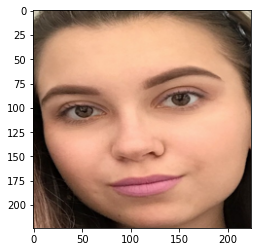

In [55]:
print_image(images2[30])

In [56]:
#тестовая выборка 
images3 = [extract_face(os.path.join(dir3,i), resize=True) for i in files3]
images4 = [extract_face(os.path.join(dir4,i), resize=True) for i in files4]

extract_face::fileName:./test_ira/41.jpeg
extract_face::fileName:./test_ira/42.jpeg
extract_face::fileName:./test_ira/43.jpeg
extract_face::fileName:./test_ira/44.jpeg
extract_face::fileName:./test_ira/45.jpeg
extract_face::fileName:./test_ira/46.jpeg
extract_face::fileName:./test_ira/47.jpeg
extract_face::fileName:./test_ira/48.jpeg
extract_face::fileName:./test_ira/49.jpeg
extract_face::fileName:./test_ira/50.jpeg


extract_face::fileName:./test_anna/41.jpeg
extract_face::fileName:./test_anna/42.jpeg
extract_face::fileName:./test_anna/43.jpeg
extract_face::fileName:./test_anna/44.jpeg
extract_face::fileName:./test_anna/45.jpeg
extract_face::fileName:./test_anna/46.jpeg
extract_face::fileName:./test_anna/47.jpeg


extract_face::fileName:./test_anna/48.jpeg
extract_face::fileName:./test_anna/49.jpeg
extract_face::fileName:./test_anna/50.jpeg


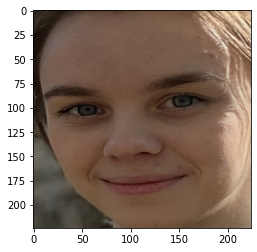

In [57]:
print_image(images1[5])

In [59]:
X_train = images1 + images2
y_train = [[1, 0]] * len(images1) + [[0, 1]] * len(images2)

X_test = images3  + images4
y_test = [[1, 0], [1, 0], [0, 1], [0, 1]]

Проведем аугментацию тренировочной выборки

In [60]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train = test_datagen.flow(np.asarray(X_train), np.asarray(y_train))

In [61]:
train = train_datagen.flow(np.asarray(X_train), np.asarray(y_train))

In [62]:
%%time
model.fit_generator(train, epochs=100, verbose=2)

C:\Users\Irina\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
3/3 - 70s - loss: 0.6928 - accuracy: 0.5375
Epoch 2/100
3/3 - 36s - loss: 0.6748 - accuracy: 0.9000
Epoch 3/100
3/3 - 32s - loss: 0.6558 - accuracy: 0.9375
Epoch 4/100
3/3 - 32s - loss: 0.6456 - accuracy: 0.9625
Epoch 5/100
3/3 - 35s - loss: 0.6289 - accuracy: 0.9750
Epoch 6/100
3/3 - 31s - loss: 0.6190 - accuracy: 0.9875
Epoch 7/100
3/3 - 33s - loss: 0.5968 - accuracy: 0.9875
Epoch 8/100
3/3 - 31s - loss: 0.5863 - accuracy: 0.9875
Epoch 9/100
3/3 - 30s - loss: 0.5725 - accuracy: 0.9750
Epoch 10/100
3/3 - 32s - loss: 0.5599 - accuracy: 0.9875
Epoch 11/100
3/3 - 56s - loss: 0.5518 - accuracy: 0.9875
Epoch 12/100
3/3 - 33s - loss: 0.5413 - accuracy: 1.0000
Epoch 13/100
3/3 - 32s - loss: 0.5235 - accuracy: 0.9875
Epoch 14/100
3/3 - 58s - loss: 0.5186 - accuracy: 1.0000
Epoch 15/100
3/3 - 56s - loss: 0.5067 - accuracy: 0.9875
Epoch 16/100
3/3 - 37s - loss: 0.4907 - accuracy: 1.0000
Epoch 17/100
3/3 - 40s - loss: 0.4773 - accuracy: 1.0000
Epoch 18/100
3/3 - 51s - loss: 0.4744 - 

In [63]:
model.save_weights("l5_face_rec_model_weights.h5")

In [64]:
model.load_weights("l5_face_rec_model_weights.h5")

Посмотрим на предсказания модели на тестовых данных:

[1,0] - Ira, [0,1] - Anna

In [65]:
model.predict(np.asarray(X_test))

array([[1.0000000e+00, 1.1912962e-21],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 8.3607411e-29],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

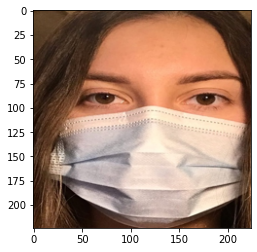

In [69]:
print_image(X_test[-1])

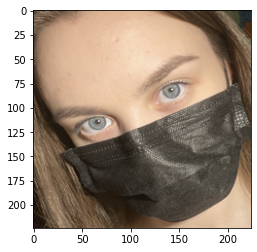

In [70]:
pyplot.imshow(Image.fromarray(X_test[3]))

In [77]:
hard_ira_path = "./hard_ira/"

hard_ira_files = os.listdir(hard_ira_path)

hard_ira_files = [file for file in hard_ira_files if  ".jpeg" in file ]

images_hard_ira = [extract_face(os.path.join(hard_ira_path,i), resize=True) for i in hard_ira_files]

extract_face::fileName:./hard_ira/hard_ira.jpeg


In [105]:
print(model.predict(np.asarray(images_hard_ira)))

[[1. 0.]]


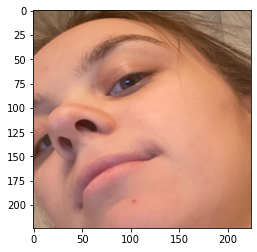

In [76]:
pyplot.imshow(Image.fromarray(images_hard_ira[0]))

In [107]:
hard_anna_path = "./hard_anna/"

hard_anna_files = os.listdir(hard_anna_path)

hard_anna_files = [file for file in hard_anna_files if  ".jpeg" in file ]

images_hard_anna = [extract_face(os.path.join(hard_anna_path,i), resize=True) for i in hard_anna_files]

extract_face::fileName:./hard_anna/hard_anna.jpeg


In [108]:
model.predict(np.asarray(images_hard_anna))

array([[0., 1.]], dtype=float32)

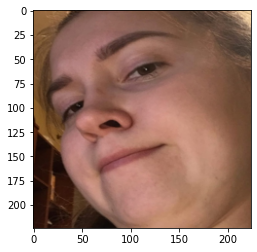

In [109]:
pyplot.imshow(Image.fromarray(images_hard_anna[0]))